In [2]:
import pandas as pd

In [3]:
zillow_df=pd.read_csv("C:\data\zillow\Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [4]:
zillow_df.head(n=5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,...,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,...,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,...,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,...,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,...,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


In [7]:
selection= (zillow_df['City']=='Philadelphia')& (zillow_df['State']=='PA')
data=zillow_df.loc[selection]

In [8]:
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
159,65787,159,19120,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,59502.0,...,164197.0,164609.0,165492.0,166469.0,167935.0,169143.0,170252.0,171164.0,172647.0,174393.0
190,65791,190,19124,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,47068.0,...,159590.0,160483.0,161630.0,163323.0,164715.0,165703.0,166622.0,167924.0,170280.0,172322.0
229,65779,229,19111,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,84629.0,...,263460.0,264330.0,265861.0,268087.0,270814.0,273048.0,274951.0,276822.0,279401.0,282256.0
281,65810,281,19143,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,61872.0,...,174992.0,175194.0,174917.0,174638.0,175085.0,175940.0,176783.0,176723.0,176919.0,177199.0
365,65801,365,19134,zip,PA,PA,Philadelphia,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,57539.0,...,120411.0,120358.0,120874.0,121939.0,122671.0,122615.0,123386.0,124098.0,125201.0,125623.0


In [9]:
data = data.drop(
    [
        "RegionID",
        "RegionType",
        "City",
        "StateName",
        "State",
        "Metro",
        "CountyName",
        "SizeRank",
    ],
    axis=1,
)

In [11]:
melted=data.melt(id_vars=["RegionName"], value_name='ZHVI',var_name='Date')

In [12]:
melted

,RegionName,Date,ZHVI
0,19120,2000-01-31,59502.0
1,19124,2000-01-31,47068.0
2,19111,2000-01-31,84629.0
3,19143,2000-01-31,61872.0
4,19134,2000-01-31,57539.0
...,...,...,...
12645,19129,2022-11-30,306243.0
12646,19118,2022-11-30,778205.0
12647,19137,2022-11-30,221233.0
12648,19102,2022-11-30,348476.0


In [15]:
melted['Date']=pd.to_datetime(melted['Date'])

In [16]:
melted['Year']=melted['Date'].dt.year

In [17]:
annual_ZHVI = melted.groupby(['RegionName', 'Year'])['ZHVI'].mean()

In [18]:
annual_ZHVI.head()

RegionName  Year
19102       2000    150979.250000
            2001    180913.166667
            2002    215358.166667
            2003    245106.833333
            2004    285037.000000
Name: ZHVI, dtype: float64

In [19]:
annual_ZHVI = annual_ZHVI.reset_index()

In [20]:
annual_ZHVI.head()

,RegionName,Year,ZHVI
0,19102,2000,150979.250000
1,19102,2001,180913.166667
2,19102,2002,215358.166667
3,19102,2003,245106.833333
4,19102,2004,285037.000000


In [21]:
year_grps = annual_ZHVI.groupby('Year')
print(year_grps)

In [25]:
def max_ZHVI_zip(grp):
    max=grp['ZHVI'].idxmax()
    return grp.loc[max,["RegionName","ZHVI"]]

In [26]:
max_zip=year_grps.apply(max_ZHVI_zip)

In [27]:
max_zip

,RegionName,ZHVI
Year,,
2000,19118.0,261768.666667
2001,19118.0,291975.250000
2002,19118.0,324657.750000
2003,19118.0,373125.333333
2004,19118.0,425509.000000
2005,19118.0,488676.750000
2006,19118.0,533484.416667
2007,19118.0,550297.166667
2008,19118.0,535936.000000


In [28]:
from matplotlib import pyplot as plt

In [40]:
with plt.style.context('ggplot'):
     fig, ax = plt.subplots(figsize=(10,6))
     for RegionName in max_zip['RegionName'].unique():
        the_region=max_zip['RegionName']==RegionName
        region_df=max_zip.loc[the_region]
        print(region_df)
        ax.plot(region_df['year'],region_df['ZHVI'],label=RegionName,linewidth=4)
     ax.legend(loc=0, ncol=3, fontsize=12)
     ax.set_ylim(260000,750000)
     ax.set_ylabel("ZHVI")
     plt.show()

      RegionName           ZHVI
Year                           
2000     19118.0  261768.666667
2001     19118.0  291975.250000
2002     19118.0  324657.750000
2003     19118.0  373125.333333
2004     19118.0  425509.000000
2005     19118.0  488676.750000
2006     19118.0  533484.416667
2007     19118.0  550297.166667
2008     19118.0  535936.000000
2009     19118.0  520613.333333
2010     19118.0  509772.333333
2011     19118.0  481011.250000
2012     19118.0  468843.583333
2013     19118.0  477974.083333
2014     19118.0  494283.250000
2015     19118.0  516830.666667
2016     19118.0  528866.916667
2017     19118.0  551288.916667
2018     19118.0  581404.000000
2019     19118.0  610791.500000
2020     19118.0  630019.583333
2021     19118.0  697569.333333
2022     19118.0  745551.545455


KeyError: 'year'

In [41]:
annual_ZHVI

,RegionName,Year,ZHVI
0,19102,2000,150979.250000
1,19102,2001,180913.166667
2,19102,2002,215358.166667
3,19102,2003,245106.833333
4,19102,2004,285037.000000
...,...,...,...
1053,19154,2018,216235.916667
1054,19154,2019,232349.500000
1055,19154,2020,245938.500000
1056,19154,2021,271610.000000


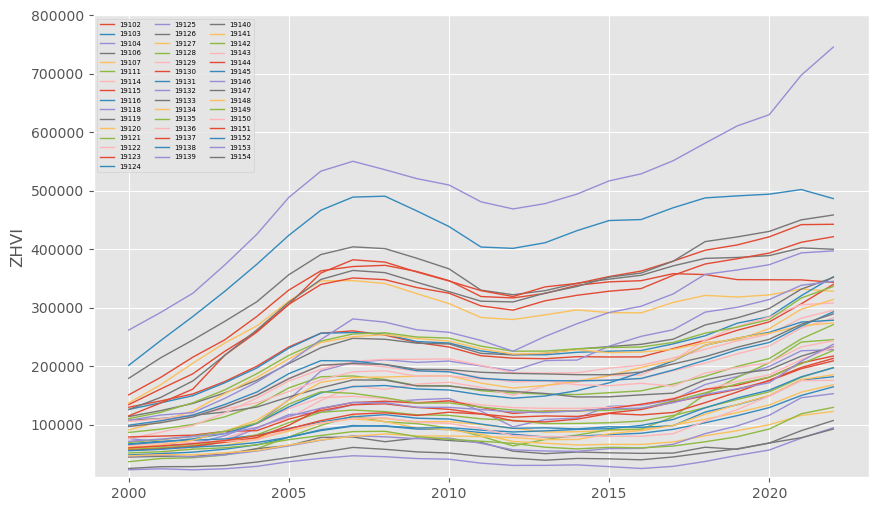

In [48]:
with plt.style.context('ggplot'):
     fig, ax = plt.subplots(figsize=(10,6))
     for RegionName in annual_ZHVI['RegionName'].unique():
        the_region=annual_ZHVI['RegionName']==RegionName
        region_df=annual_ZHVI.loc[the_region]
        ax.plot(region_df['Year'],region_df['ZHVI'],label=RegionName,linewidth=1)
     ax.legend(loc=0, ncol=3, fontsize=5)
     ax.set_ylim(10000,800000)
     ax.set_ylabel("ZHVI")
     plt.show()